# Pynanolib Manual

Welcome to Pynanolib project. This is a small library I decided to create for parsing, processing, visualizing data files obtained by performing experiment with a [Nanonis SPM Control System TM](https://www.specs-group.com/nanonis/products/). Such a software is used among experimental physicists in laboratories dedicated to electron microscopy and spectroscopy. Despite the purpose of this library being quite specific, the approach and idea presented inside this project are applicable to any kind of data file sets, and on this base, they can be extended to any interested data files. Before going forward and explaining the content of Pynanolib, let me reference two other works helped me to developing Pynanolib. The former is the library [Nanolib](https://github.com/ethz-micro/matlab_nanonis) written in MATLAB. This was a work I contributed to, several years ago. The latter is the library [nanonispy](https://github.com/underchemist/nanonispy), written in python to parse nanonis data files.

## Pynanolib modules

Pynanolib contains three modules: __load__, __process__ and __plot__, respectively in load.py, process.py and plot.py files. The data flow starts with an ETL(estracted, transformed, load) process performed with the __load__ module, a successive process of the data (__process__ module), e.g normalization, differantiation, etc., and finally, visualization of the processed data(__plot__ module).

## Load

The _load_ module reads a "nanonis" file (files with extension .sxm or .dat). It creates and stores the information of such a file in an istance of the Nanonisfile class that has simply three attributes and no public methods:
- __load.Nanonisfile.metadata__ is a dictionary storing the file metadata, e.g. file name, file path, file size, file data creation etc.
- __load.Nanonisfile.header__ is a dictionary storing the file header, i.e. the information provided by Nanonis software regarding the experiment done, e.g. experiment name, integration time, number of points, comments, etc. Any information describing the experiment preceding the data are contained in the header.
- __load.Nanonisfile.data__ is a dictionary storing the data as numpy array to the corresponding channel names.

The load.Nanonisfile module takes a single input:
1. _fpfname_: a string containing the file name with the full path of the file location. 
The output of the load module is a Nanonisfile class object.

## Process

The process module contains the following methods: _processSingleFile_ and _processMultipleFiles_.
- __process.processSingleFile__ can process one or more desired data arrays from the Nanonisfile.data dictionary of a single NanonisFile object. Such a method applies one of the processes listed in the global variable "processAllowed" defined in process.py. Some of this processes need a reference data, some others not. For example, considering a channel "Voltage" and a reference channel "Current" in the load.Nanonisfile.data. By using the process: "Division", we can obtain a processed channel "Resistance" as a result(Ohm's law: R = V/I). The resulting data will be added to the load.Nanonisfile.data dictionary under the key named "Voltage Division by Current". Examples of processes that do not need a reference data are the "Min-MaxNormalization", "Standardization" and "Differantiation".

The processSingleFile method takes from 1 to 4 inputs: 
1. _NanonisFile_: a Nanonisfile class object obtained by using the load module. This input is mandatory.
2. _processType_: a string corresponding to an allowed process type. Default value is 'Division'.
3. _chnsToProc_: a string or a list of strings corresponding to one or more channel names to be processed. Default value is 'all', i.e. all channels will be processed.
4. _ref_: a reference channel or number to which process the data with respect to. Default value 'None'.
This method appends the processed data as new channels to the attribute data of the Nanonisfile class object used as input will be updated.

- __process.processMultiFiles__ can process one or more desired data arrays among several NanonisFile objects, but it has to be implemented yet. ;)


## Plot

The plot module contains the following methods: plot.plotSingleFile.
- __plot.plotSingleFile__ can plot one or more desired data arrays from the Nanonisfile.data dictionary of a single NanonisFile object. There are three different modes* of plotting the desired data: all in the same axes, each channel on its axes but all plots within a single figure, or each channel with its axes in a different figure.

The plotSingleFile method takes from 1 to 6 inputs:
1. _Nanonisfile_: a Nanonisfile class object obtained by using the load module. This input is mandatory.
2. _xChn_: a string corresponding to the channel that will be used as X axis. Defaul value is None, i.e. indexes will be display as X axis.
3. _yChns_: a string or a list of strings corresponding to one or more channel names to be processed. Default value is 'all', i.e. all channels will be processed. Default value is 'all', i.e. all channels will be plotted.
4. _keepAxes_: a boolean input. If true all channels will be plotted on top of each other, by sharing same X and Y axes. Default value is False.
5. _keepFigure_: a boolean input. If true all plots will share the same figure. Default value is False.
6. _sfigsize_: a Tuple of width and lenght values for each single plot. Default value is (3.2, 2), i.e. Golden ratio proportions.
The output of this method is a figure or a list of figures of the plotted data.

*there are actually 4 modes of plotting considering keepAxes and keepFigure can be both True and False, but in case of plotting one single file, the case keepFigure = False already define each channel is plotted in its own figure, so there are no common Axes.

- __plot.plotMultiFiles__ can plot one or more desired data arrays from several NanonisFile objects. Similarly to the plotSingleFile the input are all the same but the first, i.e. the Nanonisfile can now be a list of Nanonisfile objects. In this case when keepAxes is True that means that data from different files are plot in the same axes. For this reason one has to be carefull to plot files that are compatible among each other, for example they must contain the same channels. In this case there are effectively 4 modes of plotting the data accordingly with all cases of keepAxes and keepFigure variables. Check an example later.
;)


## Examples

### How to use the load module

Let us start by importing the modules __load__, __plot__, and __process__ and some other usefull modules (e.g. os, pprint, pandas). Therefore we define the path where to find the folder containg some file we want to load as example. In this case we have a file "clamSpectroscopy1.dat" from the folder "ExampleFiles\\" which is in our current directory, i.e. "this_notebook_path". With the help of os library we define the full_path_file_name that will be the input of the __load.Nanonisfile method__.

In [1]:
import load, plot, process
import os, pprint
import pandas as pd

# Define path for file to be loaded
this_notebook_dir = os.path.dirname(os.path.abspath("Manual.ipynb"))
file_name = "BBX_Plasmon_HOPG_009.dat"
folder = "ExampleFiles\\"
full_path_file_name = os.path.join(this_notebook_dir, folder, file_name)
print(f"This is the file we are going to load :\n {full_path_file_name}")

This is the file we are going to load :
 C:\Users\Gabriele Bertolini\UNIVERSITA\ETH 2015-2018\Programming\my_Python\Pynanolib\ExampleFiles\BBX_Plasmon_HOPG_009.dat


We simply create the Nanonisfile class object by calling the load.Nanonisfile method and passing the input full_path_file_name and we assign it the variable myfile. We can therefore have a quick look on the three attributes _myfile.metadata_, _myfile.header_ and _myfile.data_.

In [2]:
# Load the file "file_name" from "folder" using load module
myfile = load.Nanonisfile(full_path_file_name)

# print some of the file info from metadata
print(f"These are metadata of the file: {file_name}\n")
pprint.pprint(myfile.metadata)

# print some of the file info from header
print(f"\nThese are the info from the header of the file: {file_name}\n")
pprint.pprint(myfile.header)

# print some of the file info from data
print(f"\nThese are the first few data points of the file: {file_name}\n")
print(pd.DataFrame(myfile.data).head())

These are metadata of the file: BBX_Plasmon_HOPG_009.dat

{'Date creation': 'Mon Nov 28 14:41:57 2022',
 'Date last modification': 'Fri Sep 30 14:35:03 2022',
 'File directory': 'C:\\Users\\Gabriele Bertolini\\UNIVERSITA\\ETH '
                   '2015-2018\\Programming\\my_Python\\Pynanolib\\ExampleFiles',
 'File extension': '.dat',
 'File name': 'BBX_Plasmon_HOPG_009.dat',
 'File size': 60145}

These are the info from the header of the file: BBX_Plasmon_HOPG_009.dat

{'Comment01': 'BWD, plasmons, Vtip = -132. xyz default',
 'Date': '30.09.2022 14:35:03',
 'Experiment': 'Sweep',
 'User': '',
 'X (m)': '0.000000E+0',
 'Y (m)': '0.000000E+0'}

These are the first few data points of the file: BBX_Plasmon_HOPG_009.dat

   BB Back Bias (V)  Bias (V)   Current (A)  BBX (Hz)  Tip Current (A)
0            128.00    -132.0  2.480020e-08       0.0     2.981670e-08
1            127.95    -132.0  2.481160e-08       0.0     2.982480e-08
2            127.90    -132.0  2.475480e-08       0.0     2.9

### How to use the plot module

The module plot has two methods, plot.plotSingleFile and plot.plotMultiFiles. Let us give an example of the former method by taking the file already loaded previously. The file "clamSpectra1.dat" has been already stored in the object myfile. Therefore this will be the first input of the method plot.plotSingleFile. As other inputs, suppose we are interested in all channels but the "Z (m)" and we want to plot all versus the "Bias (V)", in a single figure containing a grid with all the plots.
Therefore our inputs will be:
1. _Nanonisfile_ = myfile;
2. _xChn_ = "Bias (V)".
3. _yChns_ = ["BB Back Bias (V)", "Bias (V)", "Current (A)", "BBX (Hz)", "Tip Current (A)"] or [0, 1, 2, 3]
4. _keepAxes_ = False.
5. _keepFigure_ = True.
6. _sfigsize_ = let's keep the Default.


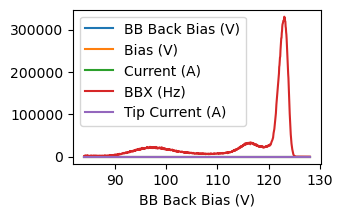

In [6]:
fig = plot.plotSingleFile(myfile, "BB Back Bias (V)", [ "BB Back Bias (V)", "Bias (V)", "Current (A)", "BBX (Hz)", "Tip Current (A)"], True, True)

### How to use the process module

The module process has two methods, process.processSingleFile and process.processMultiFiles. Let us give an example of the former method by taking the file already loaded previously. The file "clamSpectra1.dat" has been already stored in the object myfile. Therefore this will be the first input of the method process.processSingleFile. As other inputs, suppose we are interested in just the channel "BBX (Hz)" channel, but we want to process it via a division by an other channel, let us say the "Current (A)" channel.
Therefore our inputs will be:
1. _Nanonisfile_ = myfile;
2. _processType_ = "Division".
3. _chnsToProc_ = "CLAM ctr (cp int.time)"
4. _ref_ = "Current (A)".

Notice that the process types allowed at the current moment are the following, but they others will be implemented soon:
processAllowed = {
                    "Min-MaxNormalization",
                    "Standardization",
                    "Differentiation",
                    "Multiplycation",
                    "Division",
                    "Sum",
                    "Merge",
                    "Average"}

In [7]:
process.processSingleFile(myfile, processType = 'Division', chnsToProc = "BBX (Hz)", ref = "Current (A)")
# check now the new processed channel as a new column
print(pd.DataFrame(myfile.data).head())

   BB Back Bias (V)  Bias (V)   Current (A)  BBX (Hz)  Tip Current (A)  \
0            128.00    -132.0  2.480020e-08       0.0     2.981670e-08   
1            127.95    -132.0  2.481160e-08       0.0     2.982480e-08   
2            127.90    -132.0  2.475480e-08       0.0     2.975730e-08   
3            127.85    -132.0  2.478030e-08       0.0     2.979140e-08   
4            127.80    -132.0  2.472940e-08       0.0     2.973380e-08   

   BBX (Hz) Division by Current (A)  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  


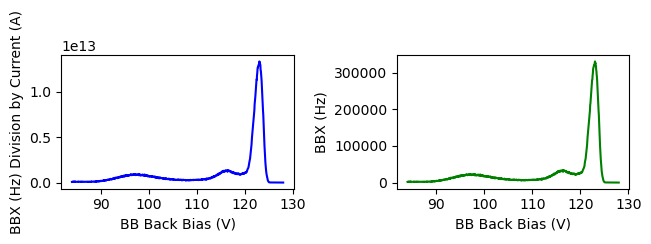

In [8]:
fig = plot.plotSingleFile(myfile, "BB Back Bias (V)", ["BBX (Hz) Division by Current (A)"
                                                    , "BBX (Hz)"], keepAxes=False, keepFigure=True)

### Plot module with more than one file

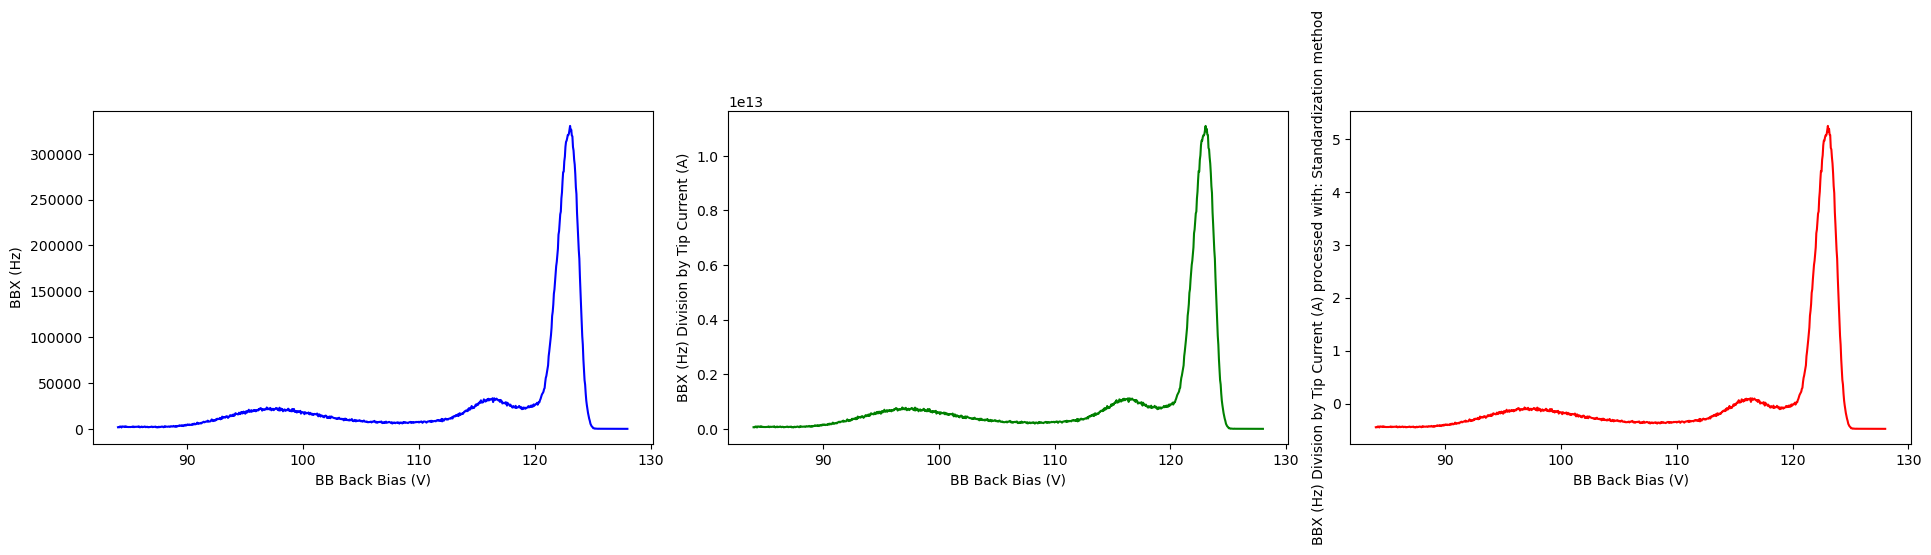

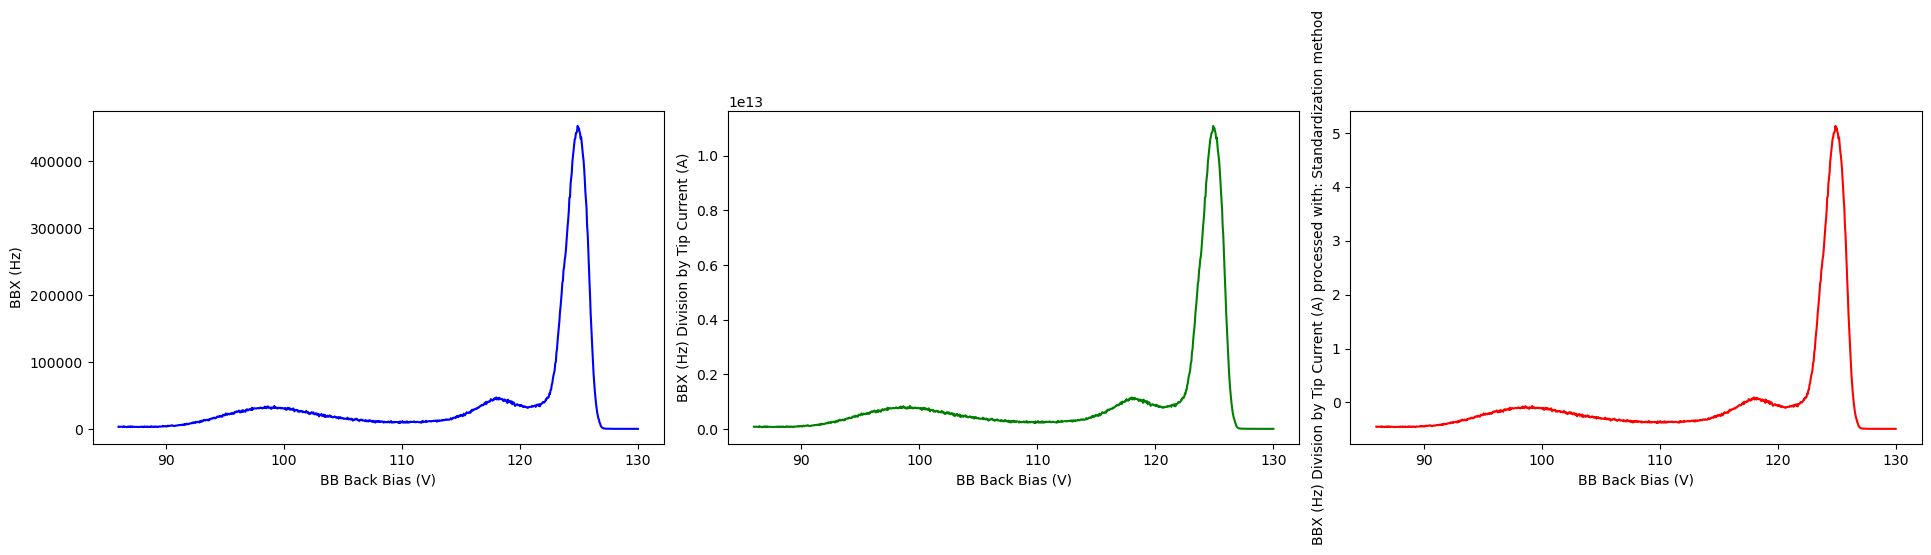

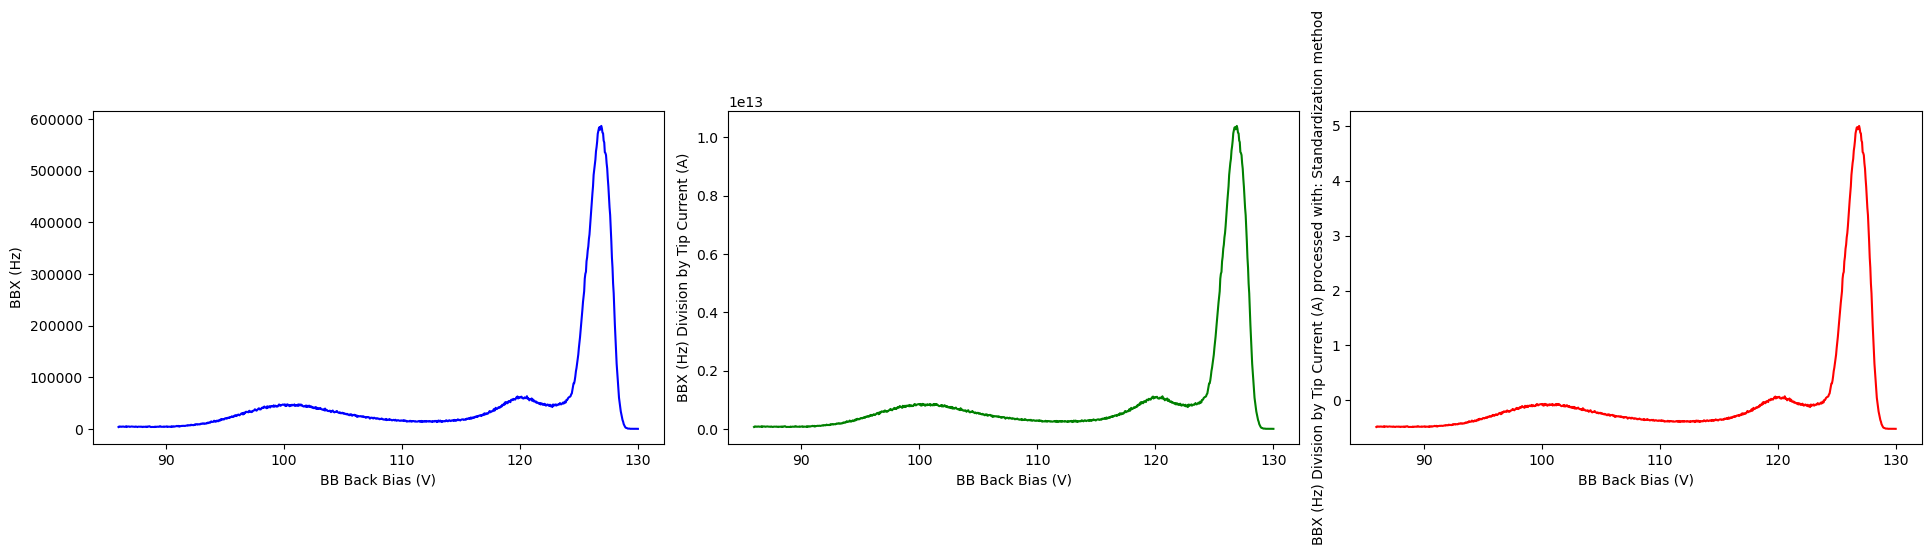

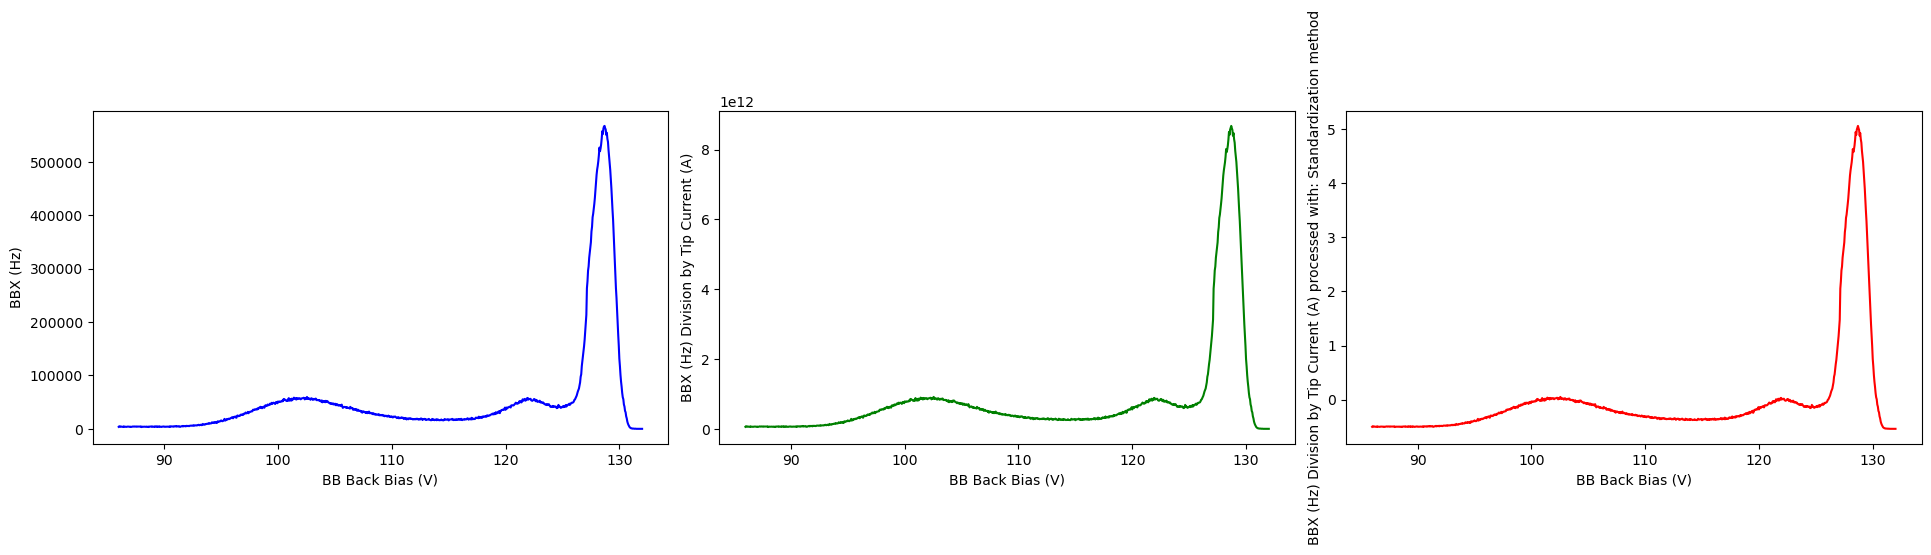

In [11]:
this_notebook_dir = os.path.dirname(os.path.abspath("Manual.ipynb"))
folder = "ExampleFiles\\"
full_path_file_name = os.path.join(this_notebook_dir, folder, file_name)
number_of_f = [9, 10, 12, 16]
my_files = []
for n in number_of_f:
    if n <= 9:
        file_name = "BBX_Plasmon_HOPG_00" + str(n) + ".dat"
    else:
        file_name = "BBX_Plasmon_HOPG_0" + str(n) + ".dat"
    full_path_file_name = os.path.join(this_notebook_dir, folder, file_name)
    # Examples of load a file
    myfile = load.Nanonisfile(full_path_file_name)
    my_files.append(myfile)
    # Example of process a channel by dividing fir an other
    ####################################################################################
    process.processSingleFile(
        Nanonisfile=myfile, processType="Division",
        chnsToProc="BBX (Hz)", ref="Tip Current (A)")
    ####################################################################################
    process.processSingleFile(
        Nanonisfile=myfile, processType="Standardization",
        chnsToProc="BBX (Hz) Division by Tip Current (A)")
    
    # plot.plotSingleFile(
    #     Nanonisfile=myfile, xChn="BB Back Bias (V)",
    #     yChns=[
    #         "BBX (Hz) Division by Tip Current (A)",
    #         "BBX (Hz) Division by Tip Current (A) "
    #         "processed with: Differentiation method"], keepAxes=False,
    #         keepFigure=False,sfigsize=(6.4, 4))
#########################################################################################
fig = plot.plotMultiFiles(my_files, xChn="BB Back Bias (V)",
                    yChns=["BBX (Hz)",
                           "BBX (Hz) Division by Tip Current (A)",
                            "BBX (Hz) Division by Tip Current (A) "
                            "processed with: Standardization method"], keepAxes=False,
                            keepFigure=True, sfigsize=(6.4, 4))